In [39]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim


## CNN

## params

In [40]:
crop_size = 300
learning_rate = 0.01
num_epochs = 501


## read image

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_76547/1965883659.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./ca.jpg')[..., :3] / 255.0


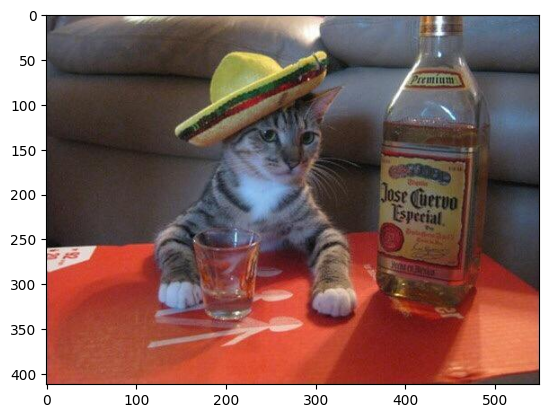

(412, 550, 3)


In [41]:
img = imageio.imread('./ca.jpg')[..., :3] / 255.0
# img_data = ImageData(img)
# img = (img * 255).astype(np.uint8)
plt.imshow(img)
plt.show()

print(img.shape)


## convert to tensor

In [42]:
# make tensor and (channel, height, width)
img_tensor = torch.Tensor(img).permute(2, 0, 1)
img_crop = transforms.CenterCrop(crop_size)(img_tensor)
# img_crop = img_crop.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

## flatten tensor to [crop_size ** 2, 3]


In [ ]:
# for mlp
# img_flat = torch.reshape(img_crop, (crop_size * crop_size, 3))
# img_flat.shape

In [43]:
img_crop.shape

torch.Size([3, 300, 300])

## create the mesh grid

In [ ]:
# for mlp
# xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
# xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
# x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
# xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
# xy_flat = torch.reshape(xy_coord_tensor, (crop_size * crop_size, 2))
# xy_flat.shape

In [44]:
# for CNN
xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
xy_coord_tensor = xy_coord_tensor.unsqueeze(0).permute(0, 3, 1, 2)
xy_coord_tensor.shape

torch.Size([1, 2, 300, 300])

## mlp

In [45]:
# class MLP(nn.Module):
#     def __init__(self, in_features, hidden_features, out_features):
#         super().__init__()

#         self.flatten = nn.Flatten()

#         self.neural_net = nn.Sequential(
            
#             # layer 1
#             nn.Linear(in_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 2
#             nn.Linear(hidden_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 3
#             nn.Linear(hidden_features, out_features),
#             nn.Sigmoid()

#         )

#     def forward(self, x):
#         return self.neural_net(x)


In [ ]:
# class MLP(torch.nn.Module):
#     def __init__(
#         self,
#         in_features: int,
#         hidden_features: int,
#         hidden_layers: int,
#         out_features: int
#     ):
#         super().__init__()
#         out_features = out_features if out_features is not None else hidden_features
#         self.net = torch.nn.Sequential(
#             torch.nn.Linear(in_features, hidden_features),
#             torch.nn.ReLU(),
#             *[torch.nn.Sequential(
#                 torch.nn.Linear(hidden_features, hidden_features),
#                 torch.nn.ReLU()
#             ) for _ in range(hidden_layers)],
#             torch.nn.Linear(hidden_features, out_features)
#         )
#     def forward(self, x: torch.Tensor):
#         return self.net(x)


In [46]:

model = nn.Sequential(
        nn.Conv2d(
            2,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            3,
            kernel_size=1,
            padding=0),
        nn.Sigmoid(),

    )

## Declare network

In [ ]:
# for mlp
# net = MLP(in_features=2, hidden_features=300, out_features=3)
# net

In [ ]:
# net = MLP(in_features=2, hidden_features=256, hidden_layers=2, out_features=3)

## train

torch.Size([1, 3, 300, 300])


/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_76547/2246782117.py:25: UserWarning: Using a target size (torch.Size([3, 300, 300])) that is different to the input size (torch.Size([1, 3, 300, 300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.l1_loss(generated, target)


Epoch 0, loss = 0.145
(300, 300, 3)
[[ 84  84  85]
 [ 85  86  86]
 [ 87  87  88]
 [ 88  89  89]
 [ 90  90  91]
 [ 92  92  93]
 [ 93  94  94]
 [ 95  95  96]
 [ 96  97  98]
 [ 98  99  99]
 [100 100 101]
 [101 102 102]
 [103 103 104]
 [104 105 105]
 [106 106 107]
 [107 107 108]
 [108 108 109]
 [109 109 110]
 [110 110 110]
 [111 111 111]
 [111 111 111]
 [112 112 112]
 [112 112 113]
 [113 113 113]
 [113 114 114]
 [114 114 114]
 [114 115 115]
 [115 115 115]
 [116 116 116]
 [116 116 117]
 [117 117 117]
 [118 118 118]
 [118 118 119]
 [119 119 119]
 [120 120 120]
 [121 121 121]
 [121 122 122]
 [122 122 122]
 [123 123 123]
 [123 123 123]
 [123 124 124]
 [124 124 124]
 [124 125 125]
 [125 125 125]
 [125 125 125]
 [125 126 126]
 [126 126 126]
 [126 126 126]
 [126 126 127]
 [127 127 127]
 [127 128 128]
 [128 129 129]
 [129 130 130]
 [130 130 131]
 [131 131 132]
 [132 132 133]
 [133 133 134]
 [134 134 135]
 [135 136 136]
 [137 137 138]
 [139 139 140]
 [140 141 142]
 [142 143 144]
 [144 145 146]
 [14

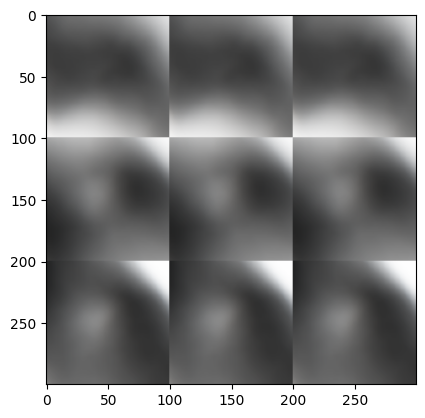

torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 300, 300])
torch.Size([1, 3, 300, 300])


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [48]:
# for mlp
# criterion = nn.MSELoss()

# model = net

# target = img_flat

# for cnn
target = img_crop

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    # generated = model(xy_flat)

    # for cnn
    generated = model(xy_coord_tensor)
    print(generated.shape)

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(generated, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.reshape((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        # print(generated[0])
        generated = (generated * 255).astype(np.uint8)
        print(generated.shape)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        print(generated[0])

        plt.close()
        plt.figure()
        plt.imshow(generated)
        plt.show()
        plt.clf()
model.eval()

## MLP

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_76547/2517324908.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('ca.jpg')[..., :3] / 255.0


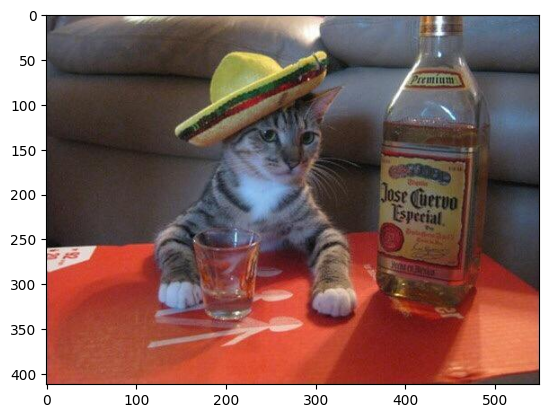

img_crop: torch.Size([3, 300, 300])
img_flat: torch.Size([90000, 3])
xy_coord_tensor: torch.Size([2, 300, 300])
xy_flat: torch.Size([90000])
Epoch 0, loss = 0.211
generated: [[[0.5909625  0.5550877  0.50844693]
  [0.5497431  0.5020121  0.5405944 ]
  [0.54048455 0.40232974 0.6868257 ]
  ...
  [0.5504447  0.48654675 0.49368468]
  [0.5328963  0.5478001  0.50980896]
  [0.59048796 0.5402512  0.42689326]]

 [[0.5107119  0.48911148 0.5994067 ]
  [0.4557845  0.49539778 0.5420715 ]
  [0.5868436  0.54679286 0.5302087 ]
  ...
  [0.5154587  0.5321455  0.5516653 ]
  [0.59854805 0.50794727 0.5551821 ]
  [0.55743265 0.5302614  0.55530554]]

 [[0.5695941  0.4834831  0.54110324]
  [0.47754365 0.46052524 0.55199885]
  [0.52849686 0.45106465 0.41690895]
  ...
  [0.50128645 0.43180266 0.7007613 ]
  [0.4301199  0.517428   0.5424328 ]
  [0.48037454 0.49163997 0.61306375]]

 ...

 [[0.59260076 0.44577348 0.48029348]
  [0.5446925  0.54379344 0.5731375 ]
  [0.50533634 0.45636687 0.53464395]
  ...
  [0.53137   

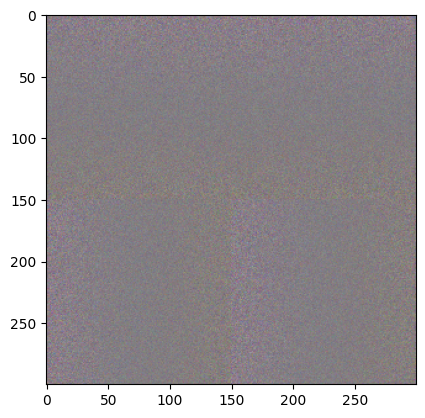

KeyboardInterrupt: 

In [36]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim

# params
crop_size = 300
learning_rate = 0.01
num_epochs = 501

# read image
img = imageio.imread('ca.jpg')[..., :3] / 255.0
# img_data = ImageData(img)
# img = (img * 255).astype(np.uint8)
plt.imshow(img)
plt.show()

# print(img.shape)

# convert to tensor

# make tensor and (channel, height, width)
img_tensor = torch.Tensor(img).permute(2, 0, 1)
img_crop = transforms.CenterCrop(crop_size)(img_tensor)

print(f'img_crop: {img_crop.shape}')

# calc mean and std for normalization
# mean = img_crop.mean(dim=[1,2])
# std = img_crop.std(dim=[1,2])

# normalize
# normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())

# img_crop = img_crop.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

# flatten tensor
# img_normalize = normalize(img_crop)
# img_flat = torch.reshape(img_normalize, (crop_size * crop_size, 3))
img_flat = torch.reshape(img_crop, (crop_size * crop_size, 3))

# min_val = img_flat.min()
# max_val = img_flat.max()

# img_flat = (img_flat - min_val) / (max_val - min_val) * 2 - 1

print(f'img_flat: {img_flat.shape}')

# create the mesh grid
xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
xy_coord_tensor = xy_coord_tensor.permute(2, 0, 1)



print(f'xy_coord_tensor: {xy_coord_tensor.shape}')

# # calc mean and std for normalization
mean = xy_coord_tensor.mean(dim=[1,2])
std = xy_coord_tensor.std(dim=[1,2])

# # normalize
normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())
xy_coord_tensor_normalize = normalize(xy_coord_tensor)

xy_flat = torch.reshape(xy_coord_tensor_normalize, (crop_size * crop_size, 2))


min_val = xy_flat.min()
max_val = xy_flat.max()

xy_flat = (xy_flat - min_val) / (max_val - min_val) * 2 - 1

print(f'xy_flat: {xy_flat[...,0].shape}')

# mlp
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # self.flatten = nn.Flatten()

        self.neural_net = nn.Sequential(
            
            # layer 1
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 2
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 3
            nn.Linear(hidden_features, out_features),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.neural_net(x)

# declare network
net = MLP(in_features=2, hidden_features=300, out_features=3)

# criterion = nn.MSELoss()

model = net

target = img_flat

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    generated = model(xy_flat)

    # for ted = model(xy_coord_tensor)

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(generated, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.view((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        print(f'generated: {generated}')
        # generated = (generated * 255).astype(np.uint8)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        # print(generated)
        plt.imshow(generated)
        plt.show()
model.eval()




